In [85]:
import panama as pn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import fluxcomp
import plotly.graph_objects as go
from particle import Particle, literals
from pathlib import Path
import warnings
import os
warnings.filterwarnings("ignore")

In [86]:
run_header, event_header, particles = pn.read_DAT(
    glob='C:/Users/Froxo/OneDrive/Escritorio/Corsika/corsika-77500/run/DAT000006', mother_columns=True
)

def add_concentric_circles(ax, radii, **kwargs):
    for radius in radii:
        circle = plt.Circle((0, 0), radius, **kwargs)
        ax.add_artist(circle)

output_dir = "C:\\Users\\Froxo\\OneDrive\\Escritorio\\Corsika\\Gráficos y simulaciones\\photon\\variable angle (10^11 GeV)\\70°" #<- Importante cambiar el directorio para cada partícula simulada

100%|██████████| 1/1.0 [00:00<00:00, 333.41it/s]


In [87]:
print(dir(particles))
df = pd.DataFrame(particles)
df

['T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__bool__', '__class__', '__contains__', '__copy__', '__dataframe__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rmatmul__', '__rmod__', '__rmul__', '__ror__', '__

particle_description         px  \
run_number event_number particle_number                                    
6          1            1                              6531.0  14.963261   
                        3                              6521.0  22.478981   
                        5                              6521.0  47.085220   
                        7                              5521.0  61.153416   
                        9                              6521.0  26.682436   
...                                                       ...        ...   
                        7784                           5521.0   9.454375   
                        7786                           6031.0  10.495100   
                        7788                           5031.0  61.591080   
                        7790                           5521.0  21.363449   
                        7792                           5521.0  11.932899   

                                               py         pz              x  \
run_number event_number particle_number                                       
6          1            1               -0.568762   6.164121 -352289.093750   
                        3               -0.212841   8.011133   47103.718750   
                        5               -0.417648  17.656607  -74571.015625   
                        7                0.355049  22.388290  -30246.939453   
                        9               -0.277637   9.604118   73567.453125   
...                                           ...        ...            ...   
                        7784             0.117439   3.645119 -258135.312500   
                        7786            -0.256627   3.563309  260835.890625   
                        7788             1.065232  22.808025  -58833.664062   
                        7790             0.121827   7.544647  129256.742188   
                        7792             0.441269   4.437575  -95095.289062   

                                                    y              t  \
run_number event_number particle_number                                
6          1            1               -41377.722656  220029.343750   
                        3                -7662.342773  232455.000000   
                        5               -16625.078125  228643.359375   
                        7                 9692.343750  230028.593750   
                        9                -7458.255859  233286.312500   
...                                               ...            ...   
                        7784            -32594.066406  222930.515625   
                        7786            -51201.722656  239197.578125   
                        7788             54905.191406  229145.078125   
                        7790            -15226.574219  235037.765625   
                        7792             92118.312500  228038.109375   

                                         corsikaid  hadron_gen  n_obs_level  \
run_number event_number particle_number                                       
6          1            1                        6          53            1   
                        3                        6          52            1   
                        5                        6          52            1   
                        7                        5          52            1   
                        9                        6          52            1   
...                                            ...         ...          ...   
                        7784                     5          52            1   
                        7786                     6           3            1   
                        7788                     5           3            1   
                        7790                     5          52            1   
                        7792                     5          52            1   

                                         ...  mother_hadr_g

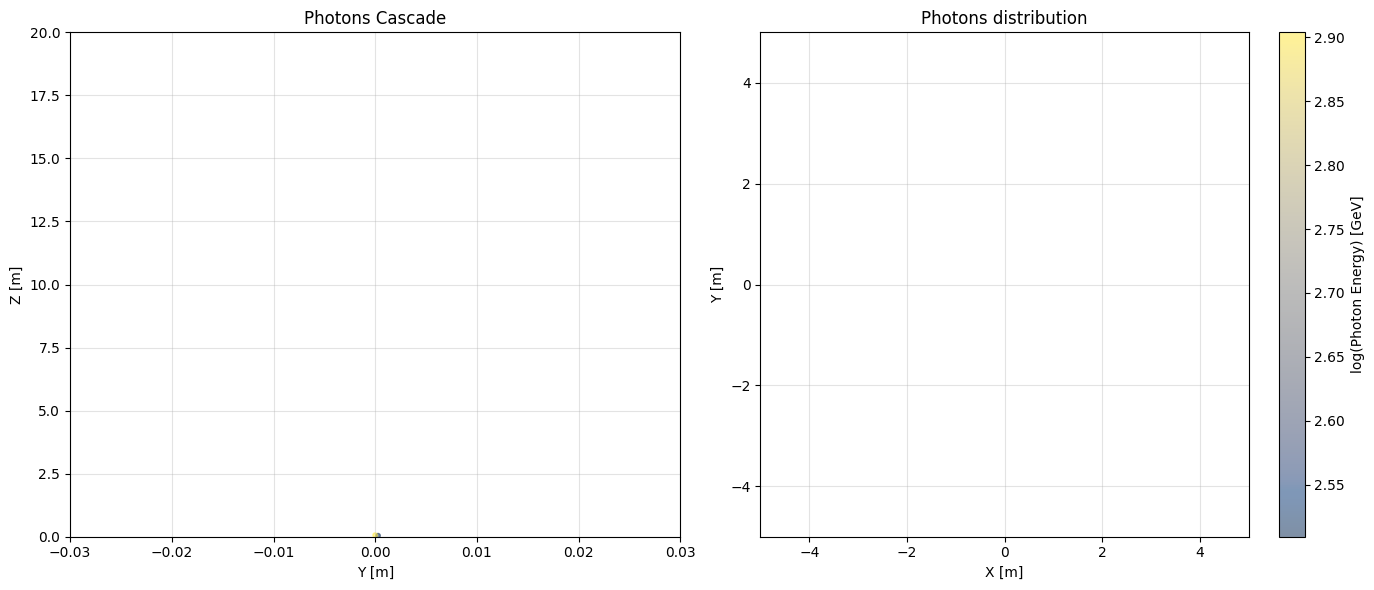

In [99]:
photon_df = particles.query("pdgid == 22")

# Calcular color basado en la energía
color = np.log(photon_df['energy'])
size = np.log10(photon_df['energy'])

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Primer gráfico (Position Y vs Position Z)
scatter1 = ax1.scatter((photon_df['py'])/100, (photon_df['pz'])/100, c=color, s=10, alpha=0.5, cmap='cividis')
ax1.set_xlabel('Y [m]')
ax1.set_ylabel('Z [m]')
ax1.set_title('Photons Cascade')
ax1.grid(alpha=0.35)
ax1.set_xlim(-0.03, 0.03)
ax1.set_ylim(0, 20)

# Segundo gráfico (Position X vs Position Y)
scatter2 = ax2.scatter((photon_df['x'])/100, (photon_df['y'])/100, c=color, s=size, alpha=0.5, cmap='cividis')
ax2.set_xlabel('X [m]')
ax2.set_ylabel('Y [m]')
ax2.set_title('Photons distribution')
ax2.grid(alpha=0.35)
ax2.set_xlim(-5, 5)
ax2.set_ylim(-5, 5)
fig.colorbar(scatter2, ax=ax2, label='log(Photon Energy) [GeV]')

# Ajustar el layout de la figura para que no se superpongan los elementos
fig.tight_layout()
plt.savefig(os.path.join(output_dir, "Photons_Cascade_Distribution.png"))
# Mostrar la figura con ambos subplots
plt.show()


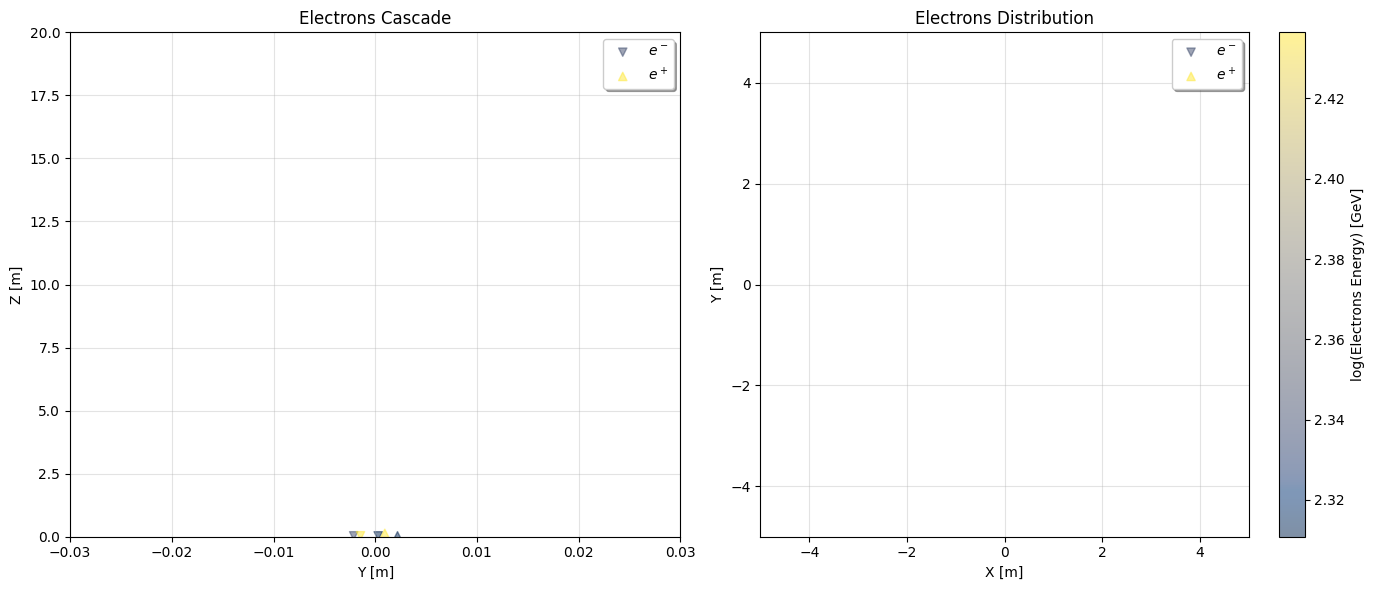

In [89]:
electron_df = particles.query("pdgid in (11, -11)")

# Diccionario de marcadores para los electrones y positrones
markers = {
    11: 'v',    # Triángulo hacia abajo para electrones
    -11: '^',   # Triángulo hacia arriba para positrones
}

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Primer gráfico (Photons: Position Y vs Position Z)
for pdgid, marker in markers.items():
    subset = electron_df[electron_df['pdgid'] == pdgid]  # Filtrar por tipo de partícula
    color = np.log(subset['energy'])
    size = np.log10(subset['energy'])
    label = '$e^-$' if pdgid == 11 else '$e^+$'
    ax1.scatter((subset['py'])/100, (subset['pz'])/100, c=color, alpha=0.5, cmap='cividis', marker=marker, label=label)

ax1.set_xlabel('Y [m]')
ax1.set_ylabel('Z [m]')
ax1.set_title('Electrons Cascade')
ax1.set_xlim(-0.03, 0.03)
ax1.set_ylim(0, 20)
ax1.legend(shadow=True)
ax1.grid(alpha=0.35)    

# Segundo gráfico (Electrons: Position X vs Position Y)
for pdgid, marker in markers.items():
    subset = electron_df[electron_df['pdgid'] == pdgid]  # Filtrar por tipo de partícula
    color = np.log(subset['energy'])
    size = np.log10(subset['energy'])
    label = '$e^-$' if pdgid == 11 else '$e^+$'
    ax2.scatter((subset['x'])/100, (subset['y'])/100, c=color, alpha=0.5, cmap='cividis', marker=marker, label=label)

ax2.set_xlabel('X [m]')
ax2.set_ylabel('Y [m]')
ax2.set_title('Electrons Distribution')
ax2.grid(alpha=0.35)
ax2.set_xlim(-5, 5)
ax2.set_ylim(-5, 5)
fig.colorbar(ax2.collections[0], ax=ax2, label='log(Electrons Energy) [GeV]')

# Agregar la leyenda al segundo gráfico
ax2.legend(shadow=True)

# Ajustar el layout de la figura para que no se superpongan los elementos
fig.tight_layout()
plt.savefig(os.path.join(output_dir, "Electrons_Cascade_Distribution.png"))
# Mostrar la figura con ambos subplots
plt.show()


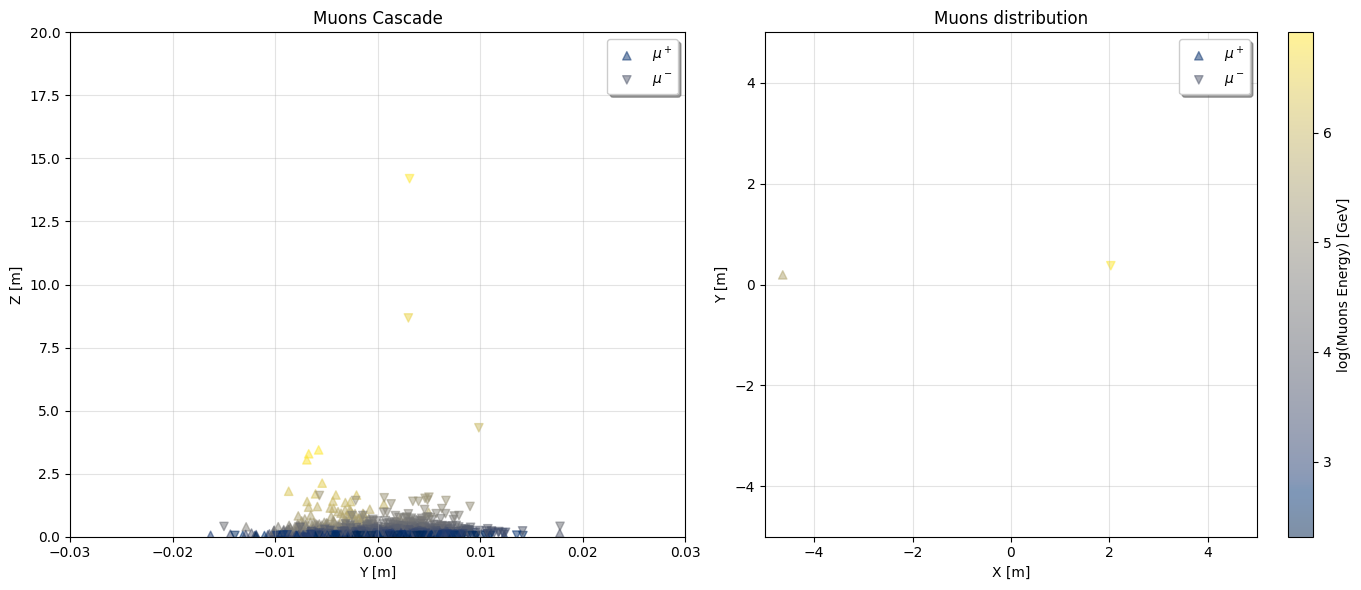

Muons average energy: 39.92591109328265 [GeV]


In [90]:
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que 'particles' es tu DataFrame original con las partículas

# Crear un DataFrame para los muones
muon_df = particles.query("pdgid in (13, -13)")

# Diccionario de marcadores para los muones
markers = {
    13: '^',    # Triángulo hacia arriba para \(\mu^-\)
    -13: 'v',   # Triángulo hacia abajo para \(\mu^+\)
}

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Primer gráfico (Muons: Position Y vs Position Z)
for pdgid, marker in markers.items():
    subset = muon_df[muon_df['pdgid'] == pdgid]  # Filtrar por tipo de partícula
    color = np.log(subset['energy'])
    size = np.log10(subset['energy'])
    label = r'$\mu^+$' if pdgid == 13 else r'$\mu^-$'
    ax1.scatter((subset['py'])/100, (subset['pz'])/100, c=color, alpha=0.5, cmap='cividis', marker=marker, label=label)

ax1.set_xlabel('Y [m]')
ax1.set_ylabel('Z [m]')
ax1.set_title('Muons Cascade')
ax1.set_xlim(-0.03, 0.03)
ax1.set_ylim(0, 20)
ax1.grid(alpha=0.35)
ax1.legend(shadow=True)

# Segundo gráfico (Muons: Position X vs Position Y)
for pdgid, marker in markers.items():
    subset = muon_df[muon_df['pdgid'] == pdgid]  # Filtrar por tipo de partícula
    color = np.log(subset['energy'])
    size = np.log10(subset['energy'])
    label = r'$\mu^+$' if pdgid == 13 else r'$\mu^-$'
    ax2.scatter((subset['x'])/100, (subset['y'])/100, c=color, alpha=0.5, cmap='cividis', marker=marker, label=label)

ax2.set_xlabel('X [m]')
ax2.set_ylabel('Y [m]')
ax2.set_title('Muons distribution')
ax2.grid(alpha=0.35)
ax2.set_xlim(-5, 5)
ax2.set_ylim(-5, 5)
fig.colorbar(ax2.collections[0], ax=ax2, label='log(Muons Energy) [GeV]')

# Agregar la leyenda al segundo gráfico
ax2.legend(shadow=True)

# Ajustar el layout de la figura para que no se superpongan los elementos
fig.tight_layout()
plt.savefig(os.path.join(output_dir, "Muons_Cascade_Distribution.png"))
# Mostrar la figura con ambos subplots
plt.show()


# Imprimir la energía promedio de los muones
print("Muons average energy:", np.mean(muon_df["energy"]), "[GeV]")


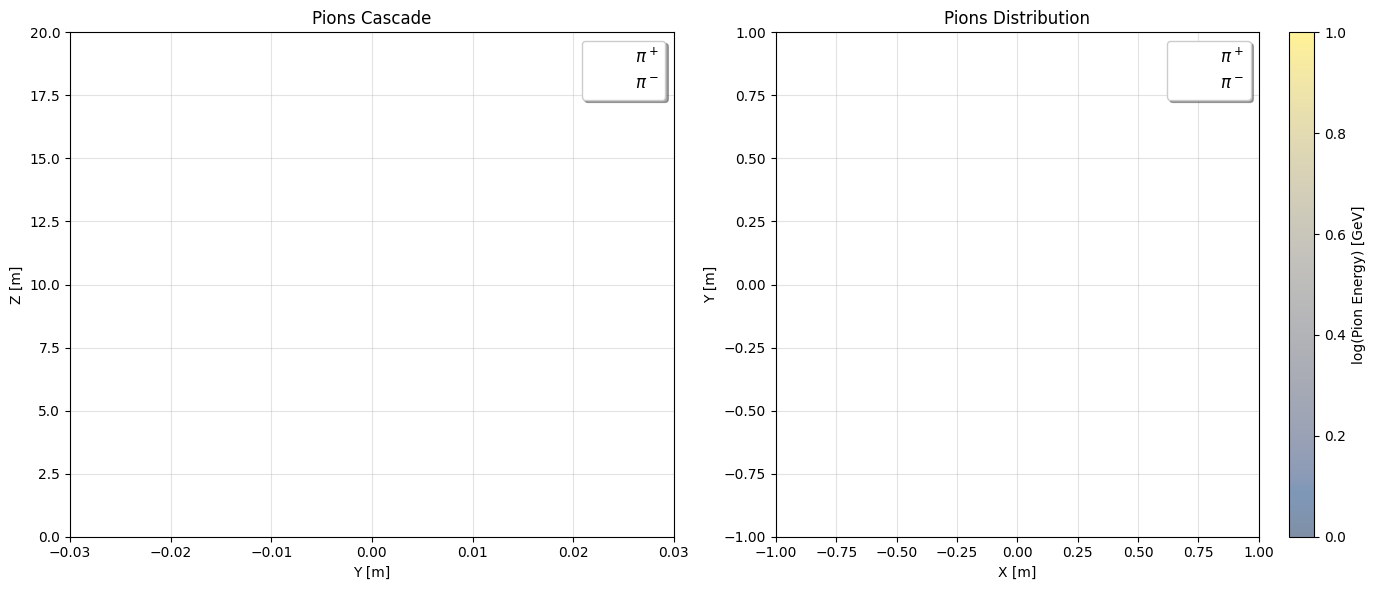

Pions average energy: nan [GeV]


In [91]:
pion_df = particles.query("pdgid in (211, -211)")

# Diccionario de marcadores para los piones
markers = {
    211: '^',    # Triángulo hacia abajo para \(\pi^+\)
    -211: 'v',   # Triángulo hacia arriba para \(\pi^-\)
}


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Primer gráfico
for pdgid, marker in markers.items():
    subset = pion_df[pion_df['pdgid'] == pdgid]  # Filtrar por tipo de partícula
    color = np.log(subset['energy'])
    size = np.log10(subset['energy'])
    label = r'$\pi^+$' if pdgid == 211 else r'$\pi^-$'
    ax1.scatter((subset['py'])/100, (subset['pz'])/100, c=color, alpha=0.5, cmap='cividis', marker=marker, label=label)

ax1.set_xlabel('Y [m]')
ax1.set_ylabel('Z [m]')
ax1.set_title('Pions Cascade')
ax1.set_xlim(-0.03, 0.03)
ax1.set_ylim(0, 20)
ax1.grid(alpha=0.35)
ax1.legend(fontsize='large', shadow=True)

# Segundo gráfico (Distribución)
for pdgid, marker in markers.items():
    subset = pion_df[pion_df['pdgid'] == pdgid]  # Filtrar por tipo de partícula
    color = np.log(subset['energy'])
    size = np.log10(subset['energy'])
    label = r'$\pi^+$' if pdgid == 211 else r'$\pi^-$'
    ax2.scatter((subset['x'])/100, (subset['y'])/100, c=color, alpha=0.5, cmap='cividis', marker=marker, label=label)

ax2.set_xlabel('X [m]')
ax2.set_ylabel('Y [m]')
ax2.set_title('Pions Distribution')
ax2.grid(alpha=0.35)
ax2.set_xlim(-1, 1)
ax2.set_ylim(-1, 1)
fig.colorbar(ax2.collections[0], ax=ax2, label='log(Pion Energy) [GeV]')

# Agregar la leyenda al segundo gráfico
ax2.legend(fontsize='large', shadow=True)

# Ajustar el layout de la figura para que no se superpongan los elementos
fig.tight_layout()
plt.savefig(os.path.join(output_dir, "PionsCascade_Distribution.png"))
# Mostrar la figura con ambos subplots
plt.show()


# Imprimir la energía promedio de los piones
print("Pions average energy:", np.mean(pion_df["energy"]), "[GeV]")

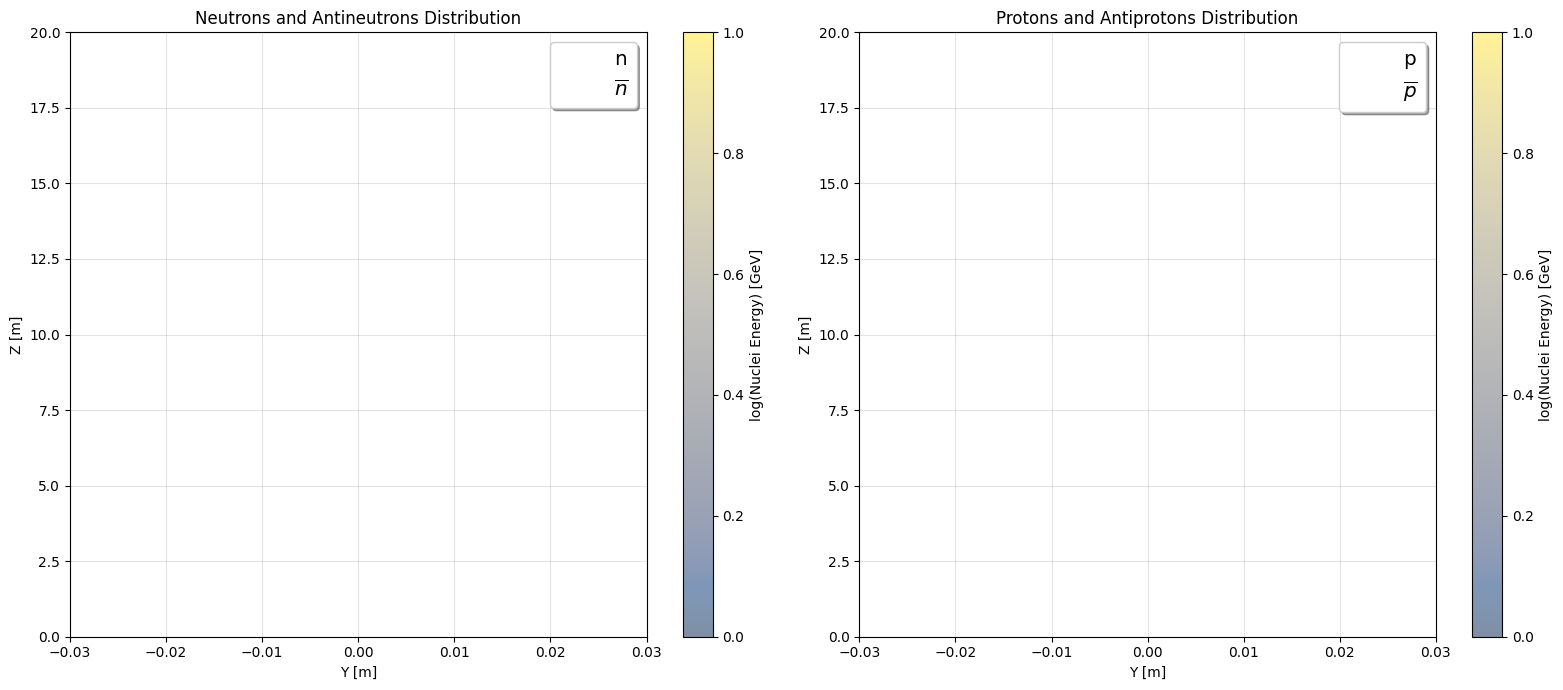

In [92]:
nuclei_df = particles.query("pdgid in (2112, 2212, -2112, -2212)")

# Diccionario de marcadores
marker_dict = {
    2112: '^',   # Neutrón
    -2112: 'o',  # Anti-neutrón
    2212: 's',   # Protón
    -2212: 'x',  # Anti-protón
}

neutrons_antineutrons_df = nuclei_df.query("pdgid in (2112, -2112)")
protons_antiprotons_df = nuclei_df.query("pdgid in (2212, -2212)")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Primer gráfico para neutrones y antineutrones
for pdgid in [2112, -2112]:
    marker = marker_dict[pdgid]
    subset = neutrons_antineutrons_df[neutrons_antineutrons_df['pdgid'] == pdgid]
    color = np.log(subset['energy'])
    size = np.log10(subset['energy'])
    scatter = ax1.scatter((subset['py'])/100, (subset['pz'])/100, c=color, alpha=0.5, cmap='cividis', marker=marker, label=f'$\overline{{n}}$' if pdgid == -2112 else 'n')

ax1.set_xlabel('Y [m]')
ax1.set_ylabel('Z [m]')
ax1.set_title('Neutrons and Antineutrons Distribution')
ax1.grid(alpha=0.35)
ax1.legend(fontsize='x-large', shadow=True)
fig.colorbar(scatter, ax=ax1, label='log(Nuclei Energy) [GeV]')
ax1.set_xlim(-0.03, 0.03)
ax1.set_ylim(0, 20)

# Segundo gráfico para protones y antiprotones
for pdgid in [2212, -2212]:
    marker = marker_dict[pdgid]
    subset = protons_antiprotons_df[protons_antiprotons_df['pdgid'] == pdgid]
    color = np.log(subset['energy'])
    size = np.log10(subset['energy'])
    scatter = ax2.scatter((subset['py'])/100, (subset['pz'])/100, c=color, alpha=0.5, cmap='cividis', marker=marker, label=f'$\overline{{p}}$' if pdgid == -2212 else 'p')
ax2.set_xlabel('Y [m]')
ax2.set_ylabel('Z [m]')
ax2.set_title('Protons and Antiprotons Distribution')
ax2.grid(alpha=0.35)
ax2.legend(fontsize='x-large', shadow=True)
fig.colorbar(scatter, ax=ax2, label='log(Nuclei Energy) [GeV]')
ax2.set_xlim(-0.03, 0.03)
ax2.set_ylim(0, 20)

# Mostrar la figura con los dos subplots
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Nuclei_Cascades.png"))
plt.show()


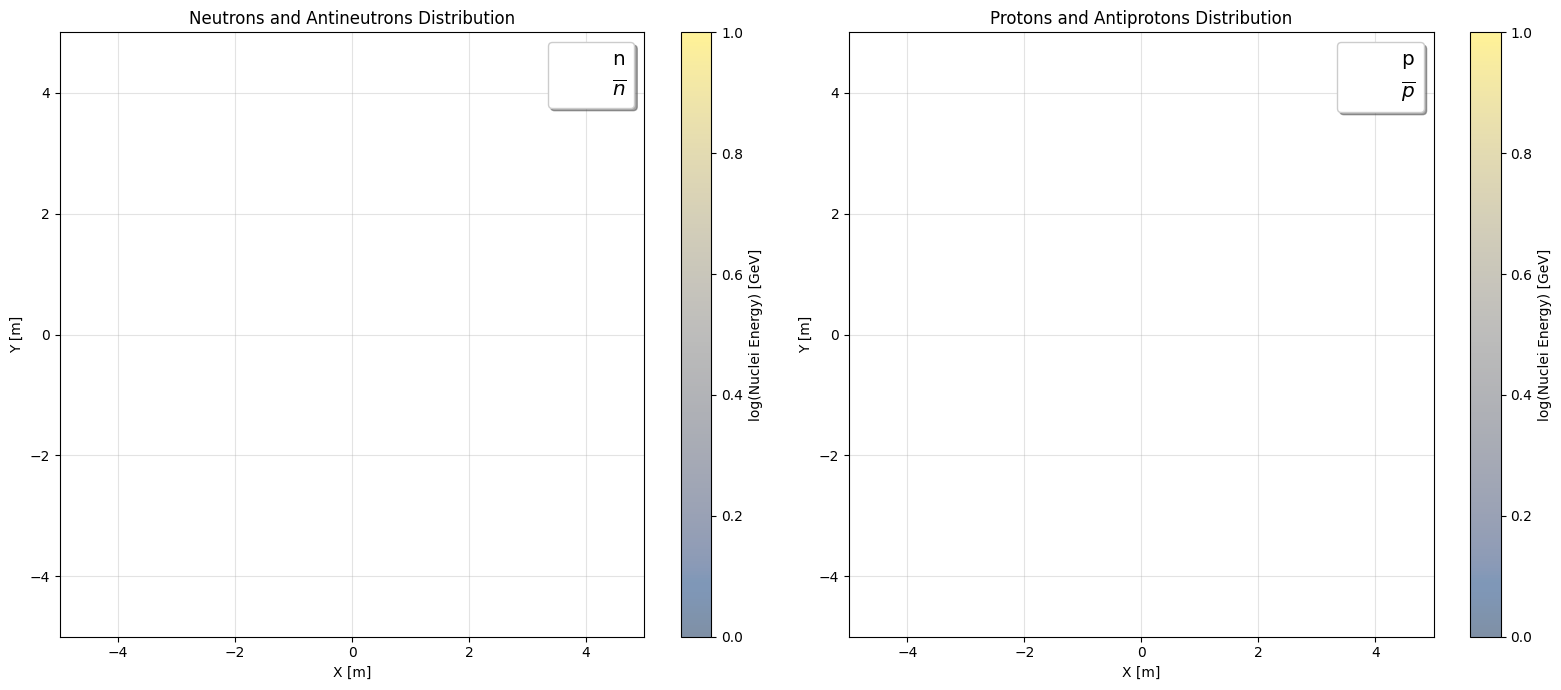

In [93]:
# Suponiendo que 'particles' es tu DataFrame original
nuclei_df = particles.query("pdgid in (2112, 2212, -2112, -2212)")

# Diccionario de marcadores
marker_dict = {
    2112: '^',   # Neutrón
    -2112: 'o',  # Anti-neutrón
    2212: 's',   # Protón
    -2212: 'x',  # Anti-protón
}

neutrons_antineutrons_df = nuclei_df.query("pdgid in (2112, -2112)")
protons_antiprotons_df = nuclei_df.query("pdgid in (2212, -2212)")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Primer gráfico para neutrones y antineutrones
for pdgid in [2112, -2112]:
    marker = marker_dict[pdgid]
    subset = neutrons_antineutrons_df[neutrons_antineutrons_df['pdgid'] == pdgid]
    color = np.log(subset['energy'])
    size = np.log10(subset['energy'])
    scatter = ax1.scatter((subset['x'])/100, (subset['y'])/100, c=color, alpha=0.5, cmap='cividis', marker=marker, label=f'$\overline{{n}}$' if pdgid == -2112 else 'n')

ax1.set_xlabel('X [m]')
ax1.set_ylabel('Y [m]')
ax1.set_title('Neutrons and Antineutrons Distribution')
ax1.grid(alpha=0.35)
ax1.legend(fontsize='x-large', shadow=True)
fig.colorbar(scatter, ax=ax1, label='log(Nuclei Energy) [GeV]')
ax1.set_xlim(-5, 5)
ax1.set_ylim(-5, 5)

# Segundo gráfico para protones y antiprotones
for pdgid in [2212, -2212]:
    marker = marker_dict[pdgid]
    subset = protons_antiprotons_df[protons_antiprotons_df['pdgid'] == pdgid]
    color = np.log(subset['energy'])
    size = np.log10(subset['energy'])
    scatter = ax2.scatter((subset['x'])/100, (subset['y'])/100, c=color, alpha=0.5, cmap='cividis', marker=marker, label=f'$\overline{{p}}$' if pdgid == -2212 else 'p')
ax2.set_xlabel('X [m]')
ax2.set_ylabel('Y [m]')
ax2.set_title('Protons and Antiprotons Distribution')
ax2.grid(alpha=0.35)
ax2.legend(fontsize='x-large', shadow=True)
fig.colorbar(scatter, ax=ax2, label='log(Nuclei Energy) [GeV]')
ax2.set_xlim(-5, 5)
ax2.set_ylim(-5, 5)

# Mostrar la figura con los dos subplots
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Nuclei_Distribution.png"))
plt.show()


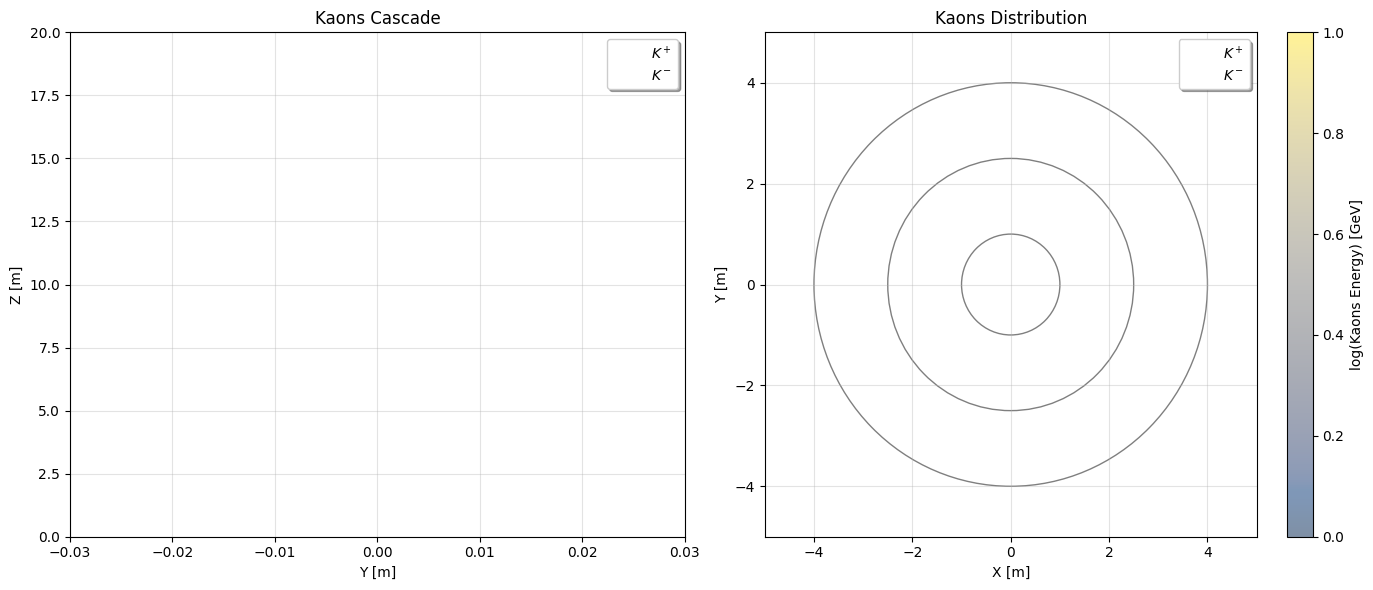

In [94]:
kaons_df = particles.query("pdgid in (321, -321)")

# Diccionario de marcadores para los kaones
markers = {
    321: 'v',    # Triángulo hacia abajo para \(K^+\)
    -321: '^',   # Triángulo hacia arriba para \(K^-\)
}

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Primer gráfico (Kaons: Position Y vs Position Z)
for pdgid, marker in markers.items():
    subset = kaons_df[kaons_df['pdgid'] == pdgid]  # Filtrar por tipo de partícula
    color = np.log(subset['energy'])
    size = np.log10(subset['energy'])
    label = r'$K^+$' if pdgid == 321 else r'$K^-$'
    ax1.scatter((subset['py'])/100, (subset['pz'])/100, c=color, alpha=0.5, cmap='cividis', marker=marker, label=label)

ax1.set_xlabel('Y [m]')
ax1.set_ylabel('Z [m]')
ax1.set_title('Kaons Cascade')
ax1.grid(alpha=0.35)
ax1.set_xlim(-0.03, 0.03)
ax1.set_ylim(0, 20)
ax1.legend(shadow=True)

# Segundo gráfico (Kaons: Position X vs Position Y)
for pdgid, marker in markers.items():
    subset = kaons_df[kaons_df['pdgid'] == pdgid]  # Filtrar por tipo de partícula
    color = np.log(subset['energy'])
    size = np.log10(subset['energy'])
    label = r'$K^+$' if pdgid == 321 else r'$K^-$'
    ax2.scatter((subset['x'])/100, (subset['y'])/100, c=color, alpha=0.5, cmap='cividis', marker=marker, label=label)

ax2.set_xlabel('X [m]')
ax2.set_ylabel('Y [m]')
ax2.set_title('Kaons Distribution')
ax2.grid(alpha=0.35)
ax2.set_xlim(-5, 5)
ax2.set_ylim(-5, 5)
add_concentric_circles(ax2, np.arange(1, 5, 1.5), color='black', alpha=0.5, fill=False)
fig.colorbar(ax2.collections[0], ax=ax2, label='log(Kaons Energy) [GeV]')

# Agregar la leyenda al segundo gráfico
ax2.legend(shadow=True)

# Ajustar el layout de la figura para que no se superpongan los elementos
fig.tight_layout()
plt.savefig(os.path.join(output_dir, "KaonsCascade_Distribution.png"))
# Mostrar la figura con ambos subplots
plt.show()


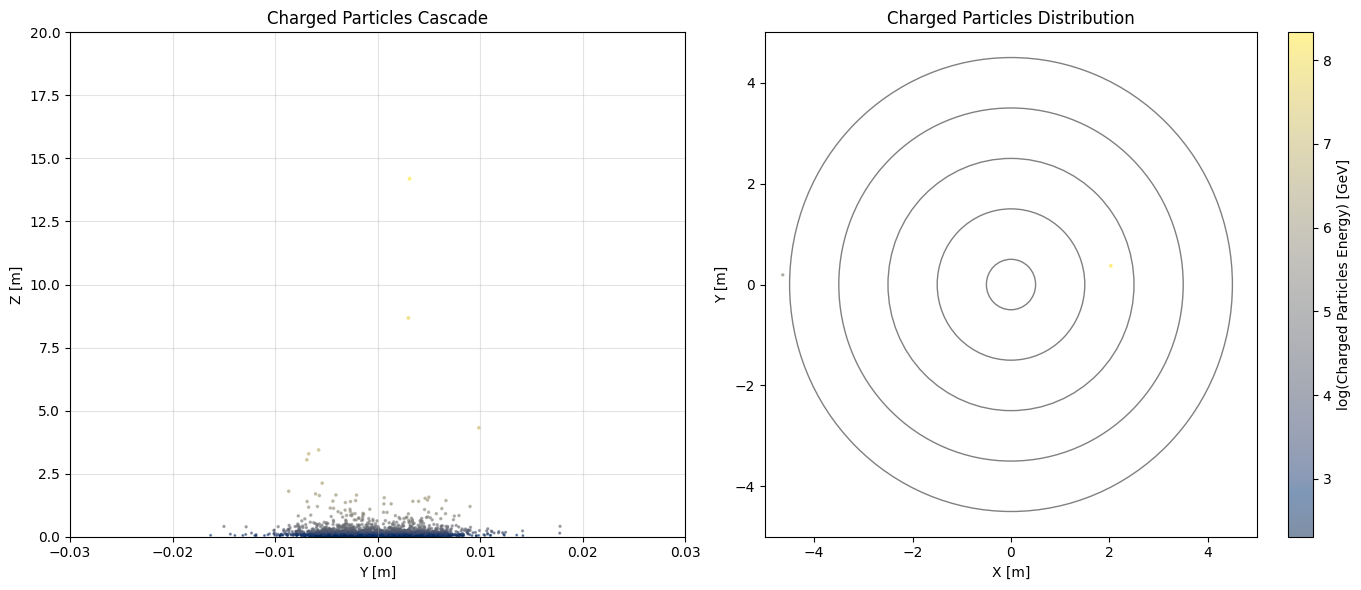

Charged Particles average energy: 39.89627238043811 [GeV]


In [95]:
def add_concentric_circles(ax, radii, **kwargs):
    for radius in radii:
        circle = plt.Circle((0, 0), radius, **kwargs)
        ax.add_artist(circle)
        
# Crear un DataFrame para las partículas cargadas
charged_df = particles.query("pdgid in (13, -13, 11, -11, 211, -211, 321, -321)")

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Primer gráfico (Charged Particles: Position Y vs Position Z)
color = np.log(charged_df['energy'])
size = np.log10(charged_df['energy'])
scatter1 = ax1.scatter((charged_df['py'])/100, (charged_df['pz'])/100, c=color, s=size, alpha=0.5, cmap='cividis')
ax1.set_xlabel('Y [m]')
ax1.set_ylabel('Z [m]')
ax1.set_title('Charged Particles Cascade')
ax1.set_xlim(-0.03, 0.03)
ax1.set_ylim(0, 20)
ax1.grid(alpha=0.35)

# Segundo gráfico (Charged Particles: Position X vs Position Y)
scatter2 = ax2.scatter((charged_df['x'])/100, (charged_df['y'])/100, c=color, s=size, alpha=0.5, cmap='cividis')
ax2.set_xlabel('X [m]')
ax2.set_ylabel('Y [m]')
ax2.set_title('Charged Particles Distribution')
#ax2.grid(alpha=0.35)
ax2.set_xlim(-5, 5)
ax2.set_ylim(-5, 5)
add_concentric_circles(ax2, np.arange(0.5, 5, 1), color='gray', alpha=1, fill=False)


# Agregar la barra de color a ambos gráficos
cbar = fig.colorbar(scatter2, ax=ax2, label='log(Charged Particles Energy) [GeV]')

# Ajustar el layout de la figura para que no se superpongan los elementos
fig.tight_layout()

# Mostrar la figura con ambos subplots
plt.savefig(os.path.join(output_dir, "Charged_Particles_Cascade_Distribution.png"))
plt.show()


# Imprimir la energía promedio de las partículas cargadas
print("Charged Particles average energy:", np.mean(charged_df["energy"]), "[GeV]")

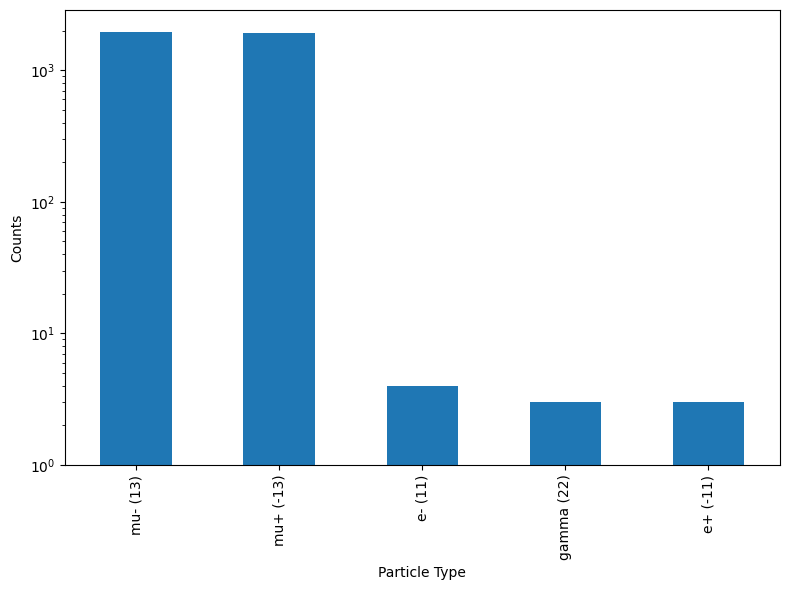

In [96]:
fig, ax = plt.subplots(figsize=(8, 6))

counts = particles["pdgid"].value_counts()
counts.index = counts.index.map(
    lambda pid: f"{Particle.from_pdgid(pid).name} ({pid})"
    if pid != 0
    else "unknown (0)"
)
counts.plot(kind="bar", log=True)

ax.set_ylabel("Counts")
ax.set_xlabel("Particle Type")

fig.tight_layout()
plt.savefig(os.path.join(output_dir, "Particles_count.png"))
None


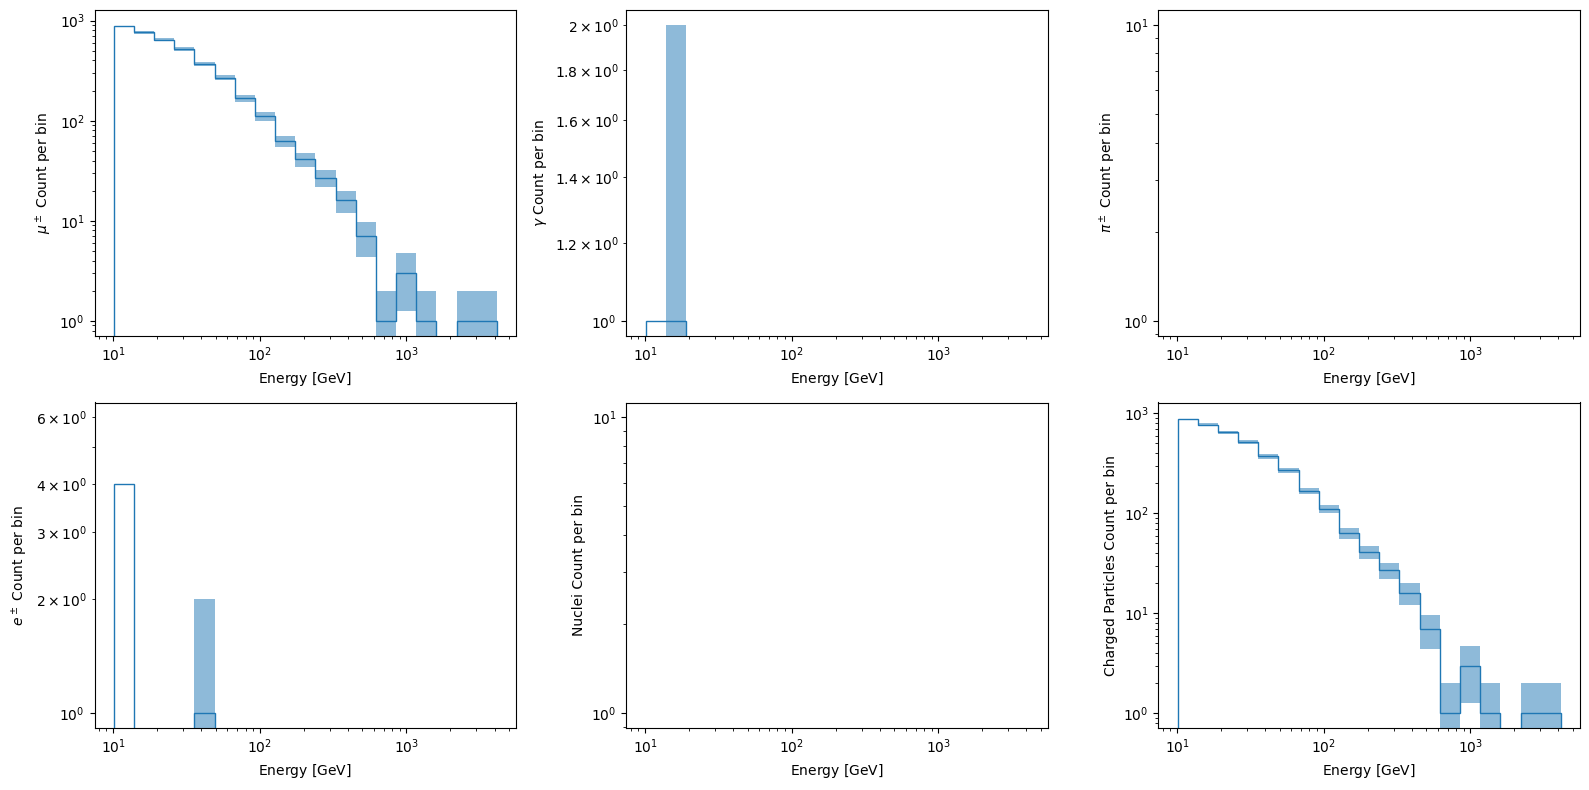

In [97]:
import matplotlib.pyplot as plt
import numpy as np

# Select energies for each type of particle
e_muons = particles.query("pdgid in (13, -13)")["energy"]
e_photons = particles.query("pdgid == 22")["energy"]
e_pions = particles.query("pdgid in (211, -211)")["energy"]
e_electrons = particles.query("pdgid in (11, -11)")["energy"]
e_nuclei = particles.query("pdgid in (2112, -2112, 2212, -2212)")["energy"]
e_charged = particles.query("pdgid in (13, -13, 11, -11, 211, -211, -321, 321)")["energy"]

# Create a new figure with 6 subplots
fig, axs = plt.subplots(2, 3, figsize=(16, 8))

# List of energies and labels for each type of particle
energies = [e_muons, e_photons, e_pions, e_electrons, e_nuclei, e_charged]
labels = [r"$\mu^\pm$", r"$\gamma$", r"$\pi^\pm$", r"$e^\pm$", "Nuclei", "Charged Particles"]

# Use logarithmically sized bins
bins = np.geomspace(min([e.min() for e in energies]), max([e.max() for e in energies]), 20)

# Iterate over each type of particle and plot the histogram in the corresponding subplot
for i, (energy, label) in enumerate(zip(energies, labels)):
    # Get the counts in each bin
    counts, _ = np.histogram(energy, bins=bins)
    
    # Calculate the subplot index (row, column)
    row = i // 3
    col = i % 3
    
    # Plot the histogram and error bands
    axs[row, col].stairs(
        counts,
        bins,
    )
    axs[row, col].fill_between(
        bins[1:], counts - np.sqrt(counts), counts + np.sqrt(counts), step="pre", alpha=0.5
    )
    
    # Set logarithmic scales
    axs[row, col].set_yscale("log")
    axs[row, col].set_xscale("log")
    
    # Add labels and titles
    axs[row, col].set_xlabel("Energy $[\mathrm{GeV}]$")
    axs[row, col].set_ylabel(f"{label} Count per bin")

# Adjust spacing between subplots
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Energies_Distribution.png"))
# Show the figure
plt.show()

